In [2]:
import xarray as xr
from cmip6_preprocessing.preprocessing import combined_preprocessing
# import PyCO2SYS as pyco2
import intake
import matplotlib.pyplot as plt
import numpy as np
import warnings
import gsw
warnings.filterwarnings("ignore")

In [3]:
col = intake.open_esm_datastore("https://storage.googleapis.com/cmip6/pangeo-cmip6.json")

In [4]:
cat_talk = col.search(variable_id= 'talk', experiment_id= 'piControl')
cat_talk.df['source_id'].unique()

array(['GFDL-ESM4', 'GFDL-CM4', 'CNRM-ESM2-1', 'IPSL-CM6A-LR', 'CESM2',
       'CESM2-WACCM', 'CanESM5-CanOE', 'CanESM5', 'MPI-ESM-1-2-HAM',
       'MPI-ESM1-2-HR', 'GISS-E2-1-G-CC', 'GISS-E2-1-G', 'MIROC-ES2L',
       'NorESM1-F', 'CESM2-WACCM-FV2', 'CESM2-FV2', 'ACCESS-ESM1-5',
       'MRI-ESM2-0', 'KIOST-ESM', 'NorESM2-LM', 'CMCC-ESM2'], dtype=object)

In [5]:
source_ids = ['CanESM5-CanOE', 'CanESM5', 'ACCESS-ESM1-5',
                        'MPI-ESM-1-2-HAM', 'IPSL-CM6A-LR', 'MIROC-ES2L',
                        'MPI-ESM1-2-HR', 'MPI-ESM1-2-LR', 'NorCPM1',
                        'NorESM1-F', 'NorESM2-LM', 'NorESM2-MM', 'GFDL-ESM4']
talk_dict = cat_talk.search(source_id=source_ids).to_dataset_dict(
    zarr_kwargs={'consolidated': True, 'use_cftime':True},
    storage_options={'token': 'anon'},
    preprocess=combined_preprocessing,
    aggregate=False)


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.member_id.table_id.variable_id.grid_label.zstore.dcpp_init_year.version'


MIROC-ES2L: No units found


In [6]:
talk_dict

{'CMIP.NCC.NorESM2-LM.piControl.r1i1p1f1.Oyr.talk.gn.gs://cmip6/CMIP6/CMIP/NCC/NorESM2-LM/piControl/r1i1p1f1/Oyr/talk/gn/v20210118/.nan.20210118': <xarray.Dataset>
 Dimensions:      (bnds: 2, rho: 53, time: 501, vertex: 4, x: 360, y: 385)
 Coordinates:
   * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
   * y            (y) float64 -80.11 -79.94 -79.77 -79.59 ... 75.22 75.23 75.23
     lat          (y, x) float64 dask.array<chunksize=(385, 360), meta=np.ndarray>
     lon          (y, x) float64 dask.array<chunksize=(385, 360), meta=np.ndarray>
   * rho          (rho) float64 1.027e+03 1.028e+03 ... 1.038e+03 1.038e+03
     rho_bnds     (rho, bnds) float64 dask.array<chunksize=(53, 2), meta=np.ndarray>
   * time         (time) object 1600-07-02 12:00:00 ... 2100-07-02 12:00:00
     time_bounds  (time, bnds) object dask.array<chunksize=(501, 2), meta=np.ndarray>
     lat_bounds   (y, x, vertex) float64 dask.array<chunksize=(385, 360, 4), meta=np.ndarray>
     l

In [6]:
a = 'CMIP.NCC.NorESM2-LM.piControl.r1i1p1f1.Oyr.talk.gn.gs://cmip6/CMIP6/CMIP/NCC/NorESM2-LM/piControl/r1i1p1f1/Oyr/talk/gn/v20210118/.nan.20210118'
 
b = 'CMIP.CCCma.CanESM5.piControl.r1i1p2f1.Omon.talk.gn.gs://cmip6/CMIP6/CMIP/CCCma/CanESM5/piControl/r1i1p2f1/Omon/talk/gn/v20190429/.nan.20190429' 

c = 'CMIP.IPSL.IPSL-CM6A-LR.piControl.r1i2p1f1.Omon.talk.gn.gs://cmip6/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/piControl/r1i2p1f1/Omon/talk/gn/v20190319/.nan.20190319'
 
e = 'CMIP.NCC.NorESM2-LM.piControl.r1i1p1f1.Oyr.talk.gr.gs://cmip6/CMIP6/CMIP/NCC/NorESM2-LM/piControl/r1i1p1f1/Oyr/talk/gr/v20210118/.nan.20210118'
 
f = 'CMIP.HAMMOZ-Consortium.MPI-ESM-1-2-HAM.piControl.r1i1p1f1.Omon.talk.gn.gs://cmip6/CMIP6/CMIP/HAMMOZ-Consortium/MPI-ESM-1-2-HAM/piControl/r1i1p1f1/Omon/talk/gn/v20190627/.nan.20190627' 

g = 'CMIP.CCCma.CanESM5.piControl.r1i1p2f1.Oyr.talk.gn.gs://cmip6/CMIP6/CMIP/CCCma/CanESM5/piControl/r1i1p2f1/Oyr/talk/gn/v20190429/.nan.20190429' 

h = 'CMIP.NOAA-GFDL.GFDL-ESM4.piControl.r1i1p1f1.Omon.talk.gr.gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4/piControl/r1i1p1f1/Omon/talk/gr/v20180701/.nan.20180701' 

k = 'CMIP.CCCma.CanESM5-CanOE.piControl.r1i1p2f1.Oyr.talk.gn.gs://cmip6/CMIP6/CMIP/CCCma/CanESM5-CanOE/piControl/r1i1p2f1/Oyr/talk/gn/v20190429/.nan.20190429'
 
l = 'CMIP.NCC.NorESM1-F.piControl.r1i1p1f1.Omon.talk.gn.gs://cmip6/CMIP6/CMIP/NCC/NorESM1-F/piControl/r1i1p1f1/Omon/talk/gn/v20190920/.nan.20190920'

m = 'CMIP.NOAA-GFDL.GFDL-ESM4.piControl.r1i1p1f1.Oyr.talk.gr.gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4/piControl/r1i1p1f1/Oyr/talk/gr/v20180701/.nan.20180701'

n = 'CMIP.CCCma.CanESM5.piControl.r1i1p1f1.Omon.talk.gn.gs://cmip6/CMIP6/CMIP/CCCma/CanESM5/piControl/r1i1p1f1/Omon/talk/gn/v20190429/.nan.20190429' 

o = 'CMIP.CSIRO.ACCESS-ESM1-5.piControl.r1i1p1f1.Oyr.talk.gn.gs://cmip6/CMIP6/CMIP/CSIRO/ACCESS-ESM1-5/piControl/r1i1p1f1/Oyr/talk/gn/v20191214/.nan.20191214'
 
p = 'CMIP.IPSL.IPSL-CM6A-LR.piControl.r1i2p1f1.Oyr.talk.gn.gs://cmip6/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/piControl/r1i2p1f1/Oyr/talk/gn/v20190319/.nan.20190319'

q = 'CMIP.MIROC.MIROC-ES2L.piControl.r1i1p1f2.Omon.talk.gn.gs://cmip6/CMIP6/CMIP/MIROC/MIROC-ES2L/piControl/r1i1p1f2/Omon/talk/gn/v20190823/.nan.20190823'
 
r = 'CMIP.MPI-M.MPI-ESM1-2-HR.piControl.r1i1p1f1.Omon.talk.gn.gs://cmip6/CMIP6/CMIP/MPI-M/MPI-ESM1-2-HR/piControl/r1i1p1f1/Omon/talk/gn/v20190710/.nan.20190710'
'CMIP.NCC.NorESM1-F.piControl.r1i1p1f1.Oyr.talk.gr.gs://cmip6/CMIP6/CMIP/NCC/NorESM1-F/piControl/r1i1p1f1/Oyr/talk/gr/v20190920/.nan.20190920'

s = 'CMIP.CSIRO.ACCESS-ESM1-5.piControl.r1i1p1f1.Omon.talk.gn.gs://cmip6/CMIP6/CMIP/CSIRO/ACCESS-ESM1-5/piControl/r1i1p1f1/Omon/talk/gn/v20191214/.nan.20191214'

u = 'CMIP.CCCma.CanESM5.piControl.r1i1p1f1.Oyr.talk.gn.gs://cmip6/CMIP6/CMIP/CCCma/CanESM5/piControl/r1i1p1f1/Oyr/talk/gn/v20190429/.nan.20190429' 


In [7]:
talka = talk_dict[a].isel(time=0).sel(x=slice(180,200)).mean('x', keep_attrs=True)
talkb = talk_dict[b].isel(time=0).sel(x=slice(180,200)).mean('x', keep_attrs=True)
talkc = talk_dict[c].isel(time=0).sel(x=slice(180,200)).mean('x', keep_attrs=True)
talke = talk_dict[e].isel(time=0).sel(x=slice(180,200)).mean('x', keep_attrs=True)
talkf = talk_dict[f].isel(time=0).sel(x=slice(180,200)).mean('x', keep_attrs=True)
talkg = talk_dict[g].isel(time=0).sel(x=slice(180,200)).mean('x', keep_attrs=True)
talkh = talk_dict[h].isel(time=0).sel(x=slice(180,200)).mean('x', keep_attrs=True)
talkk = talk_dict[k].isel(time=0).sel(x=slice(180,200)).mean('x', keep_attrs=True)
talkl = talk_dict[l].isel(time=0).sel(x=slice(180,200)).mean('x', keep_attrs=True)
talkm = talk_dict[m].isel(time=0).sel(x=slice(180,200)).mean('x', keep_attrs=True)
talkn = talk_dict[n].isel(time=0).sel(x=slice(180,200)).mean('x', keep_attrs=True)
talko = talk_dict[o].isel(time=0).sel(x=slice(180,200)).mean('x', keep_attrs=True)
talkp = talk_dict[p].isel(time=0).sel(x=slice(180,200)).mean('x', keep_attrs=True)
talkq = talk_dict[q].isel(time=0).sel(x=slice(180,200)).mean('x', keep_attrs=True)
talkr = talk_dict[r].isel(time=0).sel(x=slice(180,200)).mean('x', keep_attrs=True)
talks = talk_dict[s].isel(time=0).sel(x=slice(180,200)).mean('x', keep_attrs=True)
talku = talk_dict[u].isel(time=0).sel(x=slice(180,200)).mean('x', keep_attrs=True)

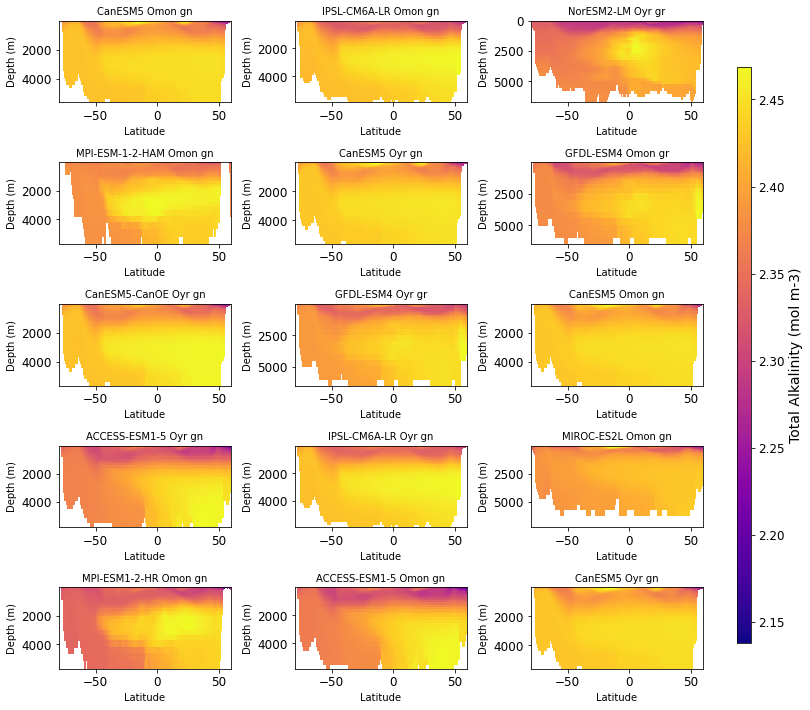

In [11]:
plt.rc('font', size = 12)
plt.rc('axes', titlesize= 10)    
plt.rc('axes', labelsize= 10)
plt.rc('figure', titlesize=14)

figa, ((axb, axc, axE), (axf, axg, axh), (axk, axm, axn), (axo, axp, axq), (axr, axs, axu)) = plt.subplots(nrows = 5,ncols = 3, figsize=[10, 10])
# ima = axa.pcolormesh(talka['y'],talka['lev'],talka.talk, cmap = 'bwr')
# axa.set_xlim([-80,60])
# axa.invert_yaxis()
# cbaxes = figa.add_axes([0.92, 0.1, 0.01, 0.8]) 
# cbara = figa.colorbar(ima, cax = cbaxes)
# cbara.set_label(talka.talk.attrs['long_name']+' ('+talka.talk.attrs['units']+')')
# axa.set_title(talka.attrs['source_id']+' '+ talka.attrs['table_id']+ ' '+ talka.attrs['grid_id'])

imb = axb.pcolormesh(talkb['y'],talkb['lev'],talkb.talk, cmap = 'plasma')
axb.set_xlim([-80,60])
axb.invert_yaxis()
axb.set_xlabel('Latitude')
axb.set_ylabel('Depth (m)')
cbaxes = figa.add_axes([1.03, 0.1, 0.02, 0.8]) 
cbara = figa.colorbar(imb, cax = cbaxes)
cbara.set_label(talkb.talk.attrs['long_name']+' ('+talkb.talk.attrs['units']+')', fontsize = 14)
axb.set_title(talkb.attrs['source_id']+ ' '+ talkb.attrs['table_id']+ ' '+ talkb.attrs['grid_label'])

imc = axc.pcolormesh(talkc['y'],talkc['lev'],talkc.talk, cmap = 'plasma')
axc.set_xlim([-80,60])
axc.invert_yaxis()
axc.set_xlabel('Latitude')
axc.set_ylabel('Depth (m)')
axc.set_title(talkc.attrs['source_id']+' '+ talkc.attrs['table_id']+ ' '+ talkc.attrs['grid_label'])

ime = axE.pcolormesh(talke['y'],talke['lev'],talke.talk, cmap = 'plasma')
axE.set_xlim([-80,60])
axE.invert_yaxis()
axE.set_xlabel('Latitude')
axE.set_ylabel('Depth (m)')
# cbare = plt.colorbar(ima)
# cbare.set_label(DICe.dissic.attrs['long_name']+'\n('+DICe.dissic.attrs['units']+')')
axE.set_title(talke.attrs['source_id']+ ' '+ talke.attrs['table_id']+ ' '+ talke.attrs['grid_label'])

imf = axf.pcolormesh(talkf['y'],talkf['lev'],talkf.talk, cmap = 'plasma')
axf.set_xlim([-80,60])
axf.invert_yaxis()
axf.set_xlabel('Latitude')
axf.set_ylabel('Depth (m)')
axf.set_title(talkf.attrs['source_id']+ ' '+ talkf.attrs['table_id']+ ' '+ talkf.attrs['grid_label'])

img = axg.pcolormesh(talkg['y'],talkg['lev'],talkg.talk, cmap = 'plasma')
axg.set_xlim([-80,60])
axg.invert_yaxis()
axg.set_xlabel('Latitude')
axg.set_ylabel('Depth (m)')
axg.set_title(talkg.attrs['source_id']+ ' '+ talkg.attrs['table_id']+ ' '+ talkg.attrs['grid_label'])

imh = axh.pcolormesh(talkh['y'],talkh['lev'],talkh.talk, cmap = 'plasma')
axh.set_xlim([-80,60])
axh.invert_yaxis()
axh.set_xlabel('Latitude')
axh.set_ylabel('Depth (m)')
axh.set_title(talkh.attrs['source_id']+ ' '+ talkh.attrs['table_id']+ ' '+ talkh.attrs['grid_label'])

imk = axk.pcolormesh(talkk['y'],talkk['lev'],talkk.talk, cmap = 'plasma')
axk.set_xlim([-80,60])
axk.invert_yaxis()
axk.set_xlabel('Latitude')
axk.set_ylabel('Depth (m)')
axk.set_title(talkk.attrs['source_id']+' '+ talkk.attrs['table_id']+ ' '+ talkk.attrs['grid_label'])

# iml = axl.pcolormesh(talkl['y'],talkl['lev'],talkl.talk, cmap = 'bwr')
# axl.set_xlim([-80,60])
# axl.invert_yaxis()
# axl.set_title(talkl.attrs['source_id']+' '+ talkl.attrs['table_id']+ ' '+ talkl.attrs['grid_label'])

imm = axm.pcolormesh(talkm['y'],talkm['lev'],talkm.talk, cmap = 'plasma')
axm.set_xlim([-80,60])
axm.invert_yaxis()
axm.set_xlabel('Latitude')
axm.set_ylabel('Depth (m)')
axm.set_title(talkm.attrs['source_id']+' '+ talkm.attrs['table_id']+ ' '+ talkm.attrs['grid_label'])

imn = axn.pcolormesh(talkn['y'],talkn['lev'],talkn.talk, cmap = 'plasma')
axn.set_xlim([-80,60])
axn.invert_yaxis()
axn.set_xlabel('Latitude')
axn.set_ylabel('Depth (m)')
axn.set_title(talkn.attrs['source_id']+' '+ talkn.attrs['table_id']+ ' '+ talkn.attrs['grid_label'])

imo = axo.pcolormesh(talko['y'],talko['lev'],talko.talk, cmap = 'plasma')
axo.set_xlim([-80,60])
axo.invert_yaxis()
axo.set_xlabel('Latitude')
axo.set_ylabel('Depth (m)')
axo.set_title(talko.attrs['source_id']+' '+ talko.attrs['table_id']+ ' '+ talko.attrs['grid_label'])

imp = axp.pcolormesh(talkp['y'],talkp['lev'],talkp.talk, cmap = 'plasma')
axp.set_xlim([-80,60])
axp.invert_yaxis()
axp.set_xlabel('Latitude')
axp.set_ylabel('Depth (m)')
axp.set_title(talkp.attrs['source_id']+' '+ talkp.attrs['table_id']+ ' '+ talkp.attrs['grid_label'])

imq = axq.pcolormesh(talkq['y'],talkq['lev'],talkq.talk, cmap = 'plasma')
axq.set_xlim([-80,60])
axq.invert_yaxis()
axq.set_xlabel('Latitude')
axq.set_ylabel('Depth (m)')
axq.set_title(talkq.attrs['source_id']+' '+ talkq.attrs['table_id']+ ' '+ talkq.attrs['grid_label'])

imr = axr.pcolormesh(talkr['y'],talkr['lev'],talkr.talk, cmap = 'plasma')
axr.set_xlim([-80,60])
axr.invert_yaxis()
axr.set_xlabel('Latitude')
axr.set_ylabel('Depth (m)')
axr.set_title(talkr.attrs['source_id']+' '+ talkr.attrs['table_id']+ ' '+ talkr.attrs['grid_label'])

ims = axs.pcolormesh(talks['y'],talks['lev'],talks.talk, cmap = 'plasma')
axs.set_xlim([-80,60])
axs.invert_yaxis()
axs.set_xlabel('Latitude')
axs.set_ylabel('Depth (m)')
axs.set_title(talks.attrs['source_id']+' '+ talks.attrs['table_id']+ ' '+ talks.attrs['grid_label'])

imu = axu.pcolormesh(talku['y'],talku['lev'],talku.talk, cmap = 'plasma')
axu.set_xlim([-80,60])
axu.invert_yaxis()
axu.set_xlabel('Latitude')
axu.set_ylabel('Depth (m)')
axu.set_title(talku.attrs['source_id']+' '+ talku.attrs['table_id']+ ' '+ talku.attrs['grid_label'])

figa.tight_layout(pad = 1)
figa.savefig('talk.png')